In [1]:
import mglearn 
import pandas as pd

In [1]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))


x:
[[1 2 3]
 [4 5 6]]


In [2]:
from scipy import sparse

eye = np.eye(4)
print("NumPy array:\n{}".format(eye))

NumPy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [5]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n{}".format(sparse_matrix))


SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [10]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print(eye_coo)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


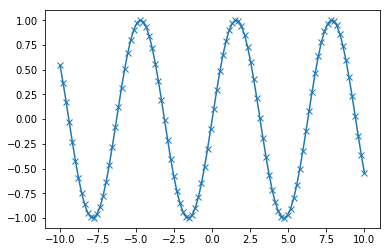

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker="x")

In [12]:
from IPython.display import display
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)
display(data_pandas[(data_pandas.Age > 30)&(data_pandas.Age < 50)])

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


,Name,Location,Age
3,Linda,London,33


prediction:[0]
prediction_name:['setosa']
Test set score: 0.97


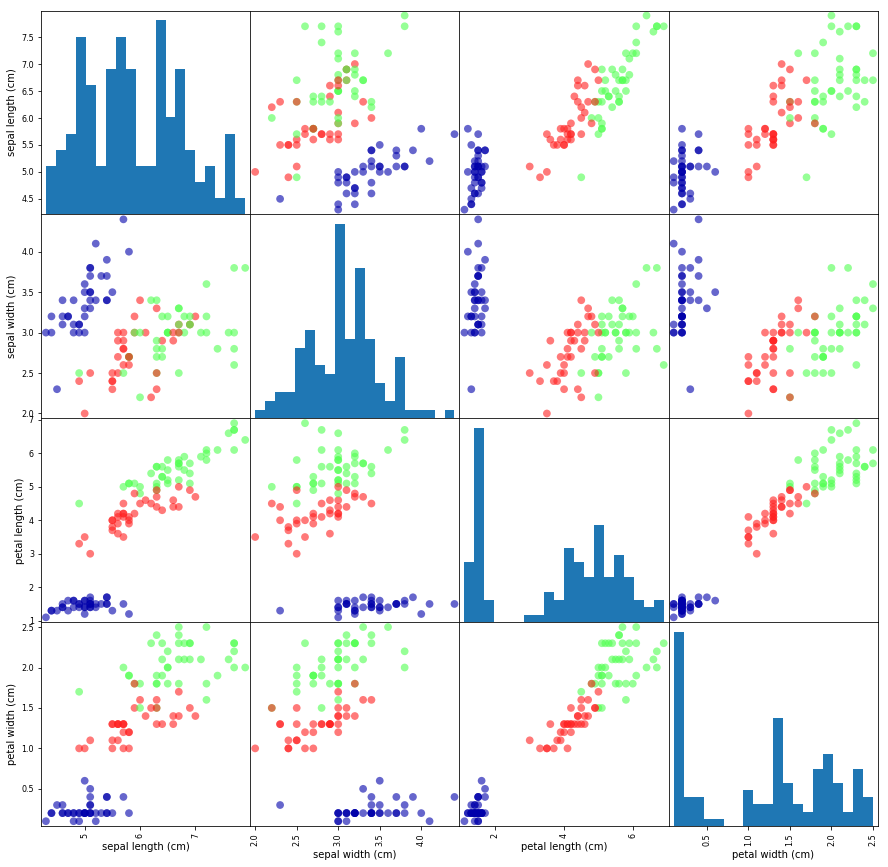

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), 
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.6, cmap=mglearn.cm3)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("prediction:{}".format(prediction))
print("prediction_name:{}".format(iris_dataset['target_names'][prediction]))

y_pred = knn.predict(X_test)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
      